# Linear Regression analysis

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('../clean_data/cleaned_data.csv')

In [11]:
# Create a map where each feature is regressed against all others
engagement_features = ['followers', 'pictures', 'videos', 'comments', 'likes']
regression_map = {feature: [x for x in engagement_features if x != feature] for feature in engagement_features}

# verify
for dependent, independents in regression_map.items():
    print(f"Dependent Variable: {dependent}")
    print(f"Independent Variables: {independents}\n")

Dependent Variable: followers
Independent Variables: ['pictures', 'videos', 'comments', 'likes']

Dependent Variable: pictures
Independent Variables: ['followers', 'videos', 'comments', 'likes']

Dependent Variable: videos
Independent Variables: ['followers', 'pictures', 'comments', 'likes']

Dependent Variable: comments
Independent Variables: ['followers', 'pictures', 'videos', 'likes']

Dependent Variable: likes
Independent Variables: ['followers', 'pictures', 'videos', 'comments']



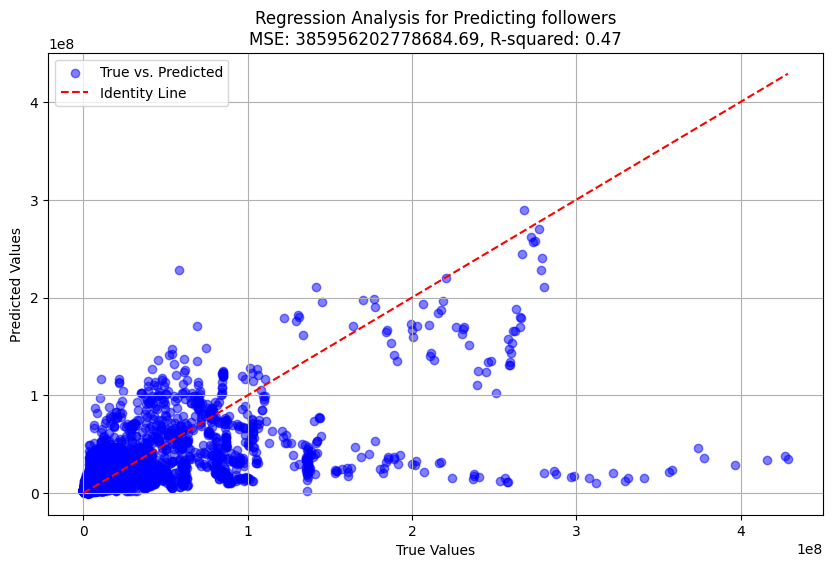

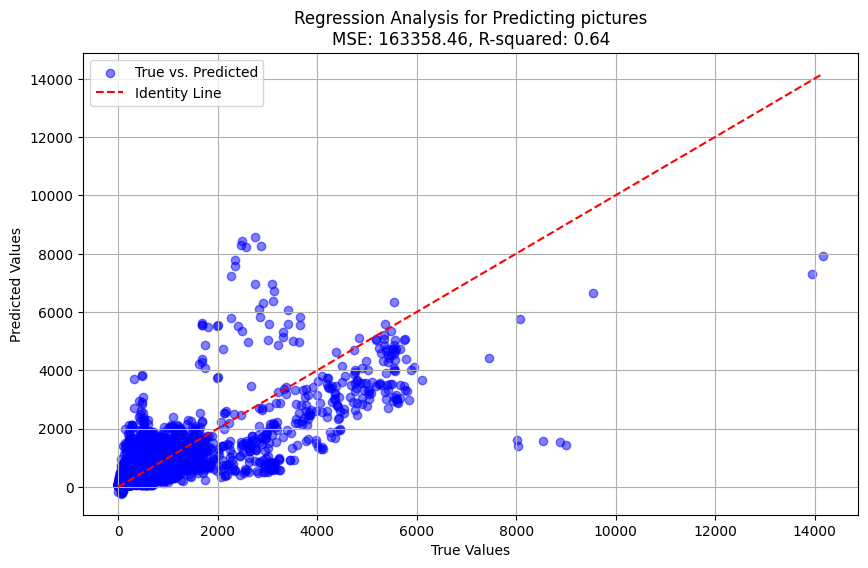

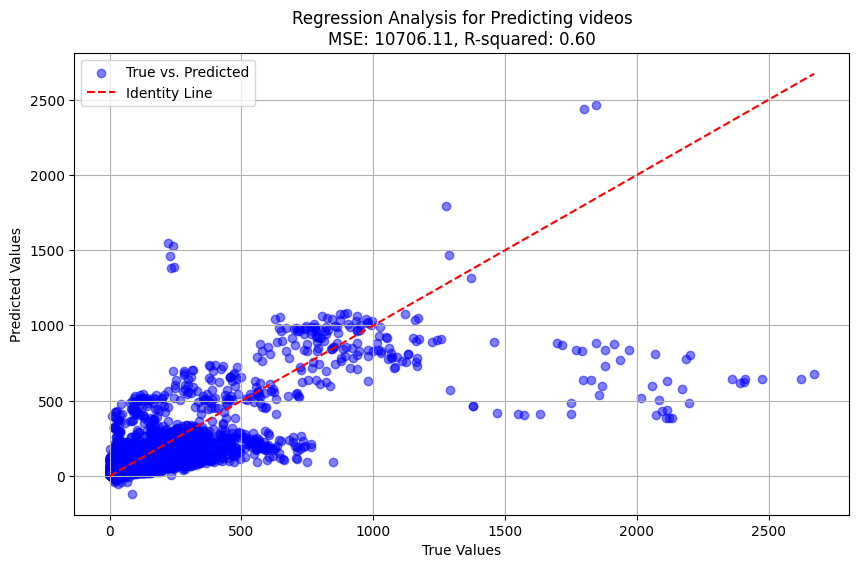

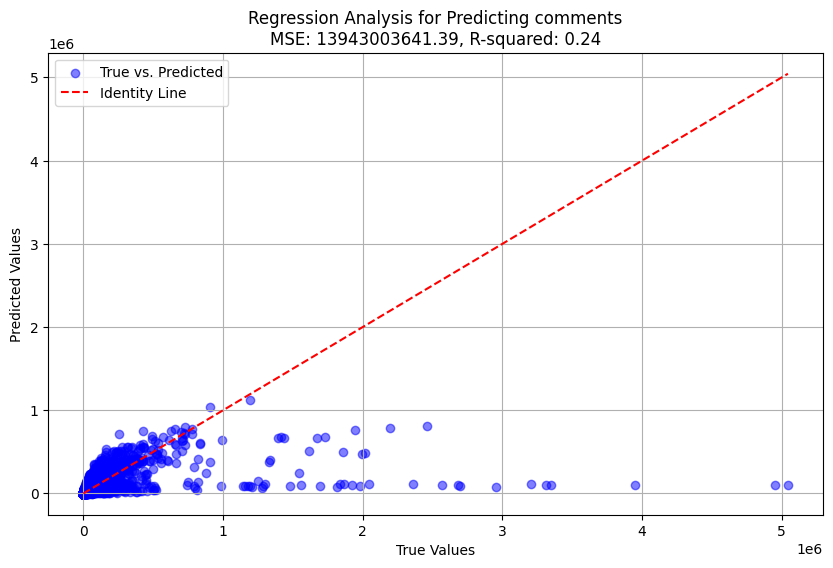

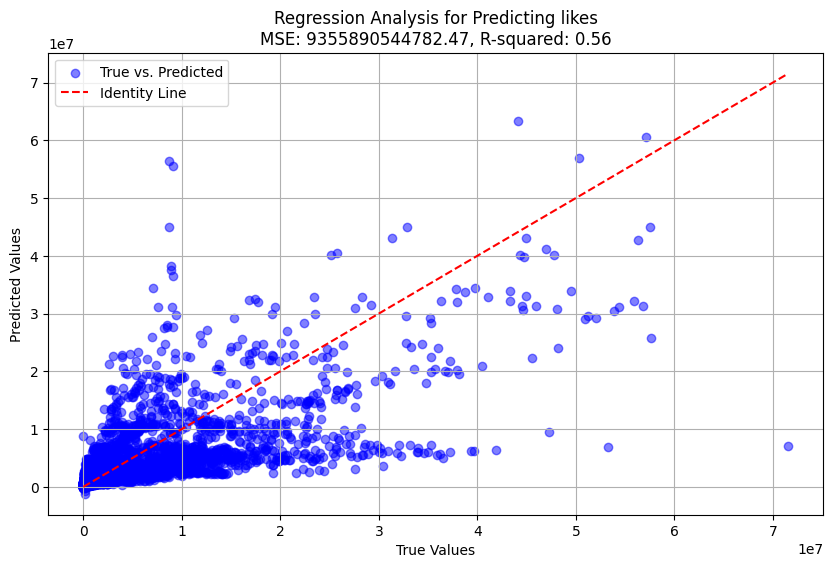

In [12]:
# Iterate over each regression scenario
for dependent, independents in regression_map.items():
    # Prepare the data
    X = df[independents]  # independent variables
    y = df[dependent]     # dependent variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Calculate R-squared and MSE for evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plotting the true values vs. predicted values and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='True vs. Predicted')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Regression Analysis for Predicting {dependent}\nMSE: {mse:.2f}, R-squared: {r2:.2f}')
    # Plotting the identity line for reference
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Identity Line')
    plt.legend()
    plt.grid(True)
    plt.show()